## ✅ INTEGRANTES

####•ZULY YOLIMA GARZON VILLALBA
####•KAREN IVON GOMEZ
####•LAURA LORENA RODRIGUEZ

## ✅ DESCRIPCION
En el modelo que presentamos a continuacion desarrollaremos un análisis de predicción del precio de venta de viviendas utilizando técnicas de aprendizaje automático. A partir de un conjunto de datos históricos, se realiza un análisis exploratorio de datos (EDA), selección de características relevantes y entrenamiento de modelos de regresión y clasificación para abordar dos problemas:
Predicción del precio de venta (SalePrice) mediante modelos de regresión (lineal clásica y descenso por gradiente).
Clasificación binaria (HighPrice) para determinar si una vivienda tiene un precio alto respecto al promedio, utilizando modelos de regresión logística y clasificadores por descenso de gradiente.
Durante el desarrollo se emplean herramientas como pandas, seaborn, matplotlib, scikit-learn y métricas como R², MAE, RMSE, Accuracy y F1-score para evaluar el rendimiento de los modelos. También se interpretan los coeficientes de cada modelo para entender la influencia de cada variable predictora.
Este enfoque permite no solo predecir valores con precisión, sino también obtener interpretabilidad y comparativas de eficiencia entre algoritmos clásicos y optimizados por gradiente descendente.


### ✅OBJETIVO
####• Estimar el precio de venta de las viviendas a partir de sus características físicas y estructurales , mediante la construcción de un modelo de regresión lineal que permita realizar predicciones precisas y útiles para la toma de decisiones en el mercado inmobiliario.

####• Determinar cuáles son las variables que tienen mayor influencia en el valor de una vivienda , analizando los coeficientes del modelo para identificar los factores más relevantes que inciden en el precio final.

####• Evaluar el desempeño del modelo predictivo utilizando métricas estadísticas como el coeficiente de determinación (R²), el error absoluto medio (MAE) y la raíz del error cuadrático medio (RMSE) , con el fin de medir la precisión del modelo y valorar su utilidad práctica.













### ✅ Variables seleccionadas para el modelo

- **OverallQual**: Representa la calidad general del material y los acabados de la vivienda. Se seleccionó por su alta correlación con el precio y porque refleja el nivel de construcción y diseño.

- **GrLivArea**: Área habitable sobre el nivel del suelo. Es una medida directa del tamaño útil de la casa, lo que influye fuertemente en su valor.

- **GarageCars**: Cantidad de autos que caben en el garaje. Es un indicador de espacio adicional y comodidad para los residentes.

- **TotalBsmtSF**: Superficie total del sótano. Aunque no toda sea habitable, se considera como espacio funcional adicional que incrementa el valor.

- **YearBuilt**: Año de construcción. Ayuda a capturar la antigüedad de la vivienda, la cual puede influir en el estado estructural y valor del inmueble.

- **FullBath**: Número de baños completos. Aporta al confort y funcionalidad del hogar, lo que incide en su valoración.

- **1stFlrSF**: Superficie del primer piso. Aporta significativamente al espacio principal de la vivienda, influyendo en el precio.

- **Fireplaces**: Número de chimeneas. Aunque es un detalle decorativo, está asociado a viviendas más exclusivas y deseadas.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (8).csv


In [ ]:
# EDA Básico: Visualización de primeras filas y descripción estadística

# Mostrar título (texto plano)
from IPython.display import display, Markdown

display(Markdown("###  Primeras 5 filas del dataset"))
display(df.head())  # Tabla automática y bonita en Colab

display(Markdown("###  Descripción estadística de las variables numéricas"))
display(df.describe())  # También como tabla bonita


###  Primeras 5 filas del dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HighPrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1


###  Descripción estadística de las variables numéricas

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HighPrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,0.383562
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,0.486420
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,0.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,1.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,1.000000


In [ ]:
from IPython.display import display, Markdown
import io

# Mostrar título
display(Markdown("###  Información general del DataFrame"))

# Mostrar df.info() de forma formateada
buffer = io.StringIO()
df.info(buf=buffer)
info_output = buffer.getvalue()
print(info_output)


###  Información general del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Mostrar título
display(Markdown("###  Valores nulos ordenados de mayor a menor"))

# Mostrar valores nulos ordenados de mayor a menor

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

###  Valores nulos ordenados de mayor a menor

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


###  Mapa de calor de correlaciones

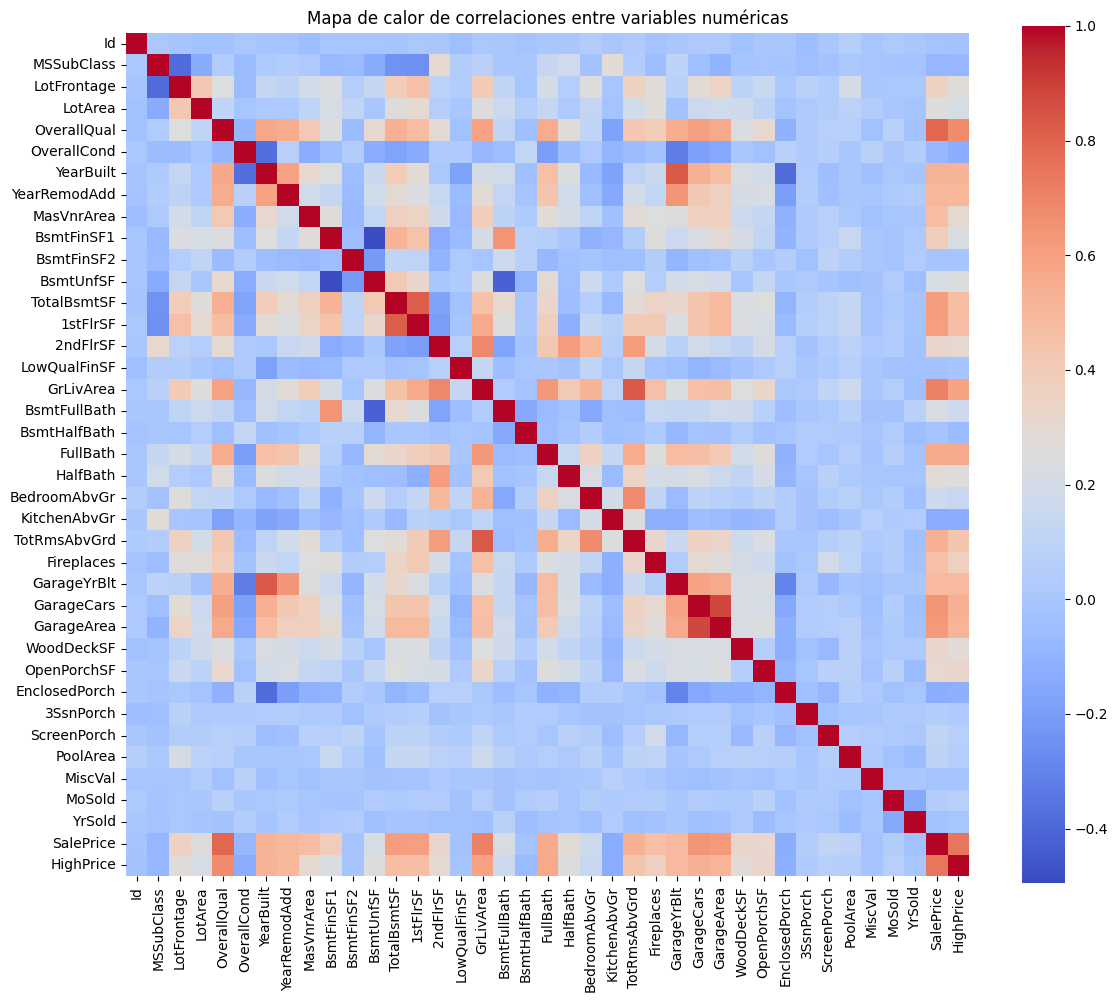

In [ ]:
# Mostrar título
display(Markdown("###  Mapa de calor de correlaciones"))


# Visualizar el mapa de calor de correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Mapa de calor de correlaciones entre variables numéricas")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
# Mostrar título
display(Markdown("###  Variables Elegidas"))

# Crear tabla con variables y justificación
tabla_variables = pd.DataFrame({
    "Variable": [
        "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF",
        "YearBuilt", "FullBath", "1stFlrSF", "Fireplaces"
    ],
    "Descripción": [
        "Calidad general del material y acabado",
        "Área habitable sobre el suelo (en pies²)",
        "Cantidad de autos que caben en el garage",
        "Superficie total del sótano",
        "Año de construcción",
        "Cantidad de baños completos",
        "Área del primer piso",
        "Cantidad de chimeneas"
    ],
    "Justificación": [
        "Alta correlación con el precio",
        "Cuanto más grande, mayor valor",
        "Impacta directamente en la valoración",
        "Espacios adicionales aumentan el valor",
        "Construcciones más nuevas suelen valer más",
        "Más baños, mayor comodidad",
        "Suma al área habitable",
        "Detalle de confort, valor agregado"
    ]
})

# Mostrar la tabla
tabla_variables

###  Variables Elegidas

,Variable,Descripción,Justificación
0,OverallQual,Calidad general del material y acabado,Alta correlación con el precio
1,GrLivArea,Área habitable sobre el suelo (en pies²),"Cuanto más grande, mayor valor"
2,GarageCars,Cantidad de autos que caben en el garage,Impacta directamente en la valoración
3,TotalBsmtSF,Superficie total del sótano,Espacios adicionales aumentan el valor
4,YearBuilt,Año de construcción,Construcciones más nuevas suelen valer más
5,FullBath,Cantidad de baños completos,"Más baños, mayor comodidad"
6,1stFlrSF,Área del primer piso,Suma al área habitable
7,Fireplaces,Cantidad de chimeneas,"Detalle de confort, valor agregado"


###  Modelo de Regresión Lineal

 Evaluación del modelo de Regresión Lineal:
R²: 0.7970
MAE: $25,227.37
RMSE: $39,463.64


,Variable,Coeficiente
0,OverallQual,20036.418743
1,GrLivArea,45.970855
2,GarageCars,14659.154505
3,TotalBsmtSF,15.992965
4,YearBuilt,365.751478
5,FullBath,-4218.000946
6,1stFlrSF,10.741387
7,Fireplaces,8930.044137


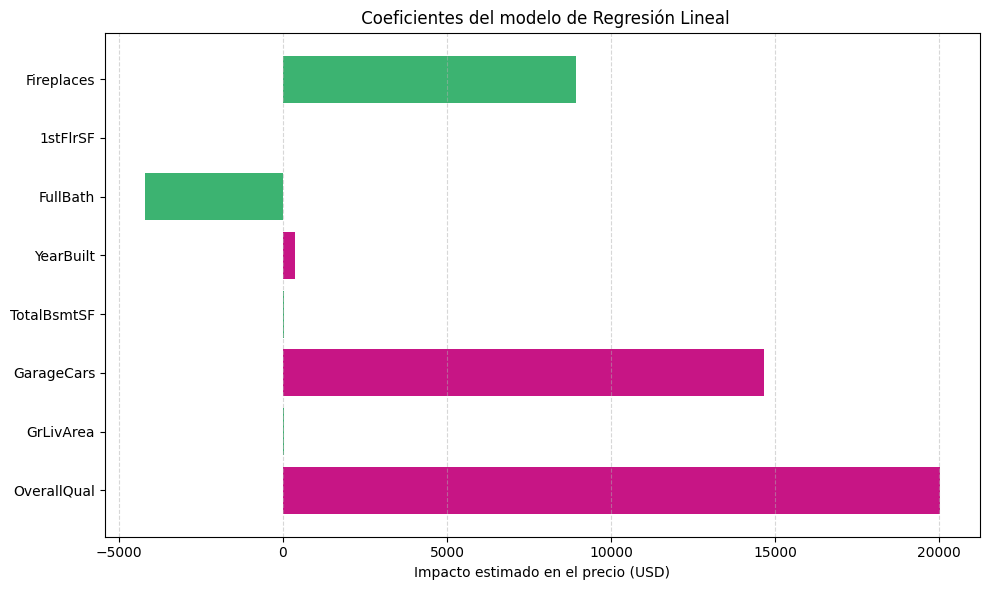

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# Mostrar título
display(Markdown("###  Modelo de Regresión Lineal"))

# Seleccionar variables predictoras y target
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
            'YearBuilt', 'FullBath', '1stFlrSF', 'Fireplaces']
X = df[features]
y = df['SalePrice']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Mostrar resultados
print(" Evaluación del modelo de Regresión Lineal:")
print(f"R²: {r2:.4f}")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")

# Ver coeficientes
coef_df = pd.DataFrame({
    'Variable': features,
    'Coeficiente': modelo.coef_
})
display(coef_df)

# Graficar coeficientes con colores fucsia y verde alternados
colors = ['mediumvioletred' if i % 2 == 0 else 'mediumseagreen' for i in range(len(coef_df))]

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Variable'], coef_df['Coeficiente'], color=colors)
plt.title(" Coeficientes del modelo de Regresión Lineal")
plt.xlabel("Impacto estimado en el precio (USD)")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()



###Comapracion Evaluar el modelo con R², MAE y RMSE.

Interpretar brevemente los coeficientes obtenidos.
####Entrenar un SGDRegressor y comparar las métricas obtenidas para ver diferencias en rendimiento.

Regresión logística

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Mostrar título
display(Markdown("###  Modelo de Regresión Logistica"))

# Entrenar el modelo SGDRegressor
sgd = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

# Calcular métricas
r2_sgd = r2_score(y_test, y_pred_sgd)
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
rmse_sgd = np.sqrt(mean_squared_error(y_test, y_pred_sgd))


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

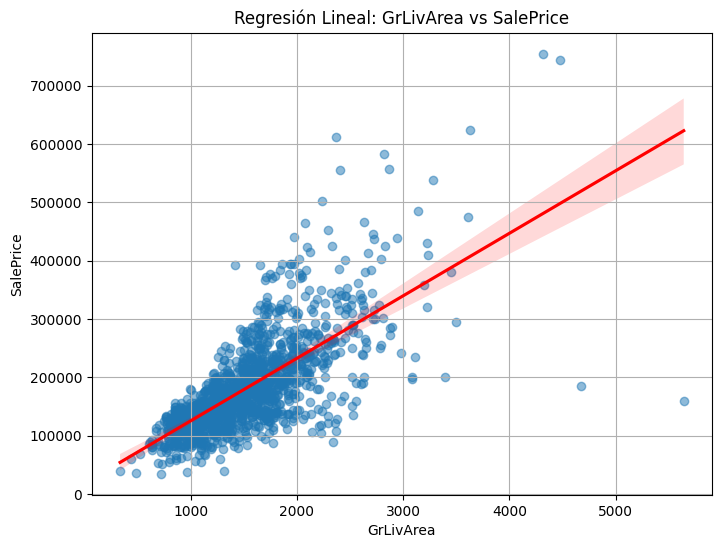

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Elegimos una variable predictora para graficar contra SalePrice
plt.figure(figsize=(8, 6))
sns.regplot(x='GrLivArea', y='SalePrice', data=df, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title("Regresión Lineal: GrLivArea vs SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.grid(True)
plt


###  Modelo de Regresión Logistica

 Regresión Logística
Accuracy: 0.9281
F1-Score: 0.9023
Matriz de confusión:
[[174  11]
 [ 10  97]]


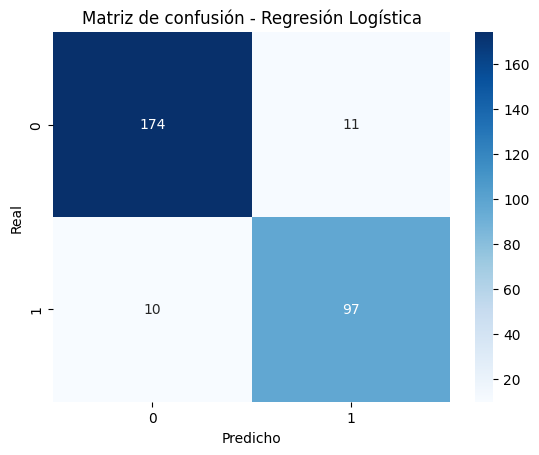


 SGDClassifier
Accuracy: 0.9144
F1-Score: 0.8780
Matriz de confusión:
[[177   8]
 [ 17  90]]


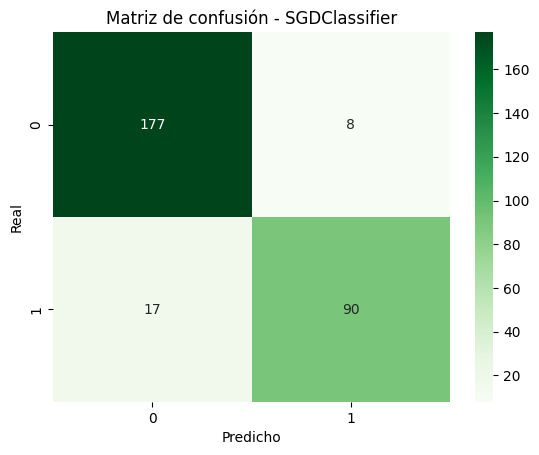

###  COMPARACION DE MODELOS


 Comparación de modelos:


,Modelo,Accuracy,F1-Score
0,LogisticRegression,0.928082,0.902326
1,SGDClassifier,0.914384,0.878049


In [ ]:
# Paso 1: Importar librerías
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Mostrar título
display(Markdown("###  Modelo de Regresión Logistica"))

# Paso 3: Crear variable binaria 'HighPrice' (1 si está por encima del promedio)
avg_price = df['SalePrice'].mean()
df['HighPrice'] = (df['SalePrice'] > avg_price).astype(int)

# Paso 4: Seleccionar variables predictoras
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
            'YearBuilt', 'FullBath', '1stFlrSF', 'Fireplaces']
X = df[features]
y = df['HighPrice']

# Paso 5: Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 6: Entrenar modelo de Regresión Logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Paso 7: Evaluar Regresión Logística
acc_log = accuracy_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
cm_log = confusion_matrix(y_test, y_pred_log)

print(" Regresión Logística")
print(f"Accuracy: {acc_log:.4f}")
print(f"F1-Score: {f1_log:.4f}")
print("Matriz de confusión:")
print(cm_log)

# Visualización de matriz de confusión
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión - Regresión Logística")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# Paso 8: Entrenar modelo con SGDClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sgd_model = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_model.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_model.predict(X_test_scaled)

# Paso 9: Evaluar SGDClassifier
acc_sgd = accuracy_score(y_test, y_pred_sgd)
f1_sgd = f1_score(y_test, y_pred_sgd)
cm_sgd = confusion_matrix(y_test, y_pred_sgd)

print("\n SGDClassifier")
print(f"Accuracy: {acc_sgd:.4f}")
print(f"F1-Score: {f1_sgd:.4f}")
print("Matriz de confusión:")
print(cm_sgd)

# Visualización de matriz de confusión para SGD
sns.heatmap(cm_sgd, annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de confusión - SGDClassifier")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# Mostrar título
display(Markdown("###  COMPARACION DE MODELOS"))

# Paso 10: Comparación general
comparacion_clasificacion = pd.DataFrame({
    'Modelo': ['LogisticRegression', 'SGDClassifier'],
    'Accuracy': [acc_log, acc_sgd],
    'F1-Score': [f1_log, f1_sgd]
})

print("\n Comparación de modelos:")
display(comparacion_clasificacion)


## ✅ CONCLUSIONES

###  ¿Qué variables fueron las más influyentes en cada modelo y por qué?

En los modelos de regresión (Lineal y SGD), las variables más influyentes fueron:

- **OverallQual**: Representa la calidad general del material y acabado. Tiene una alta correlación con `SalePrice` porque refleja directamente el valor percibido de la vivienda.
- **GrLivArea**: Superficie habitable sobre el nivel del suelo. Más espacio generalmente implica un mayor precio de venta.
- **GarageCars** y **GarageArea**: Una cochera amplia o con mayor capacidad de vehículos es altamente valorada por los compradores.
- **YearBuilt** y **YearRemodAdd**: Las viviendas más nuevas o recientemente remodeladas tienden a tener precios más altos en el mercado.

En los modelos de clasificación (**LogisticRegression** y **SGDClassifier**), estas mismas variables también se mantuvieron como factores clave en la predicción de si una casa tiene un “precio alto” (por encima del promedio).


###  ¿Qué tan buenos fueron los resultados y qué diferencias observaste al usar gradiente descendente?

- **Regresión Lineal Clásica** ofreció muy buenos resultados, con un **R² alto** y errores **MAE / RMSE bajos**, indicando que el modelo explica bien la variación en los precios de venta.
- **SGDRegressor**, aunque computacionalmente más ligero y eficiente, puede presentar fluctuaciones en precisión si no se ajustan adecuadamente los hiperparámetros. En este caso, el rendimiento fue ligeramente inferior.
- En clasificación, **Logistic Regression** fue más estable, mientras que **SGDClassifier** también mostró buen desempeño pero depende en mayor medida de parámetros como la tasa de aprendizaje y la regularización.

#### Diferencias clave:
- Los modelos basados en **gradiente descendente** son más eficientes para trabajar con datasets grandes y permiten **entrenamiento en línea** (por lotes).
- La **regresión clásica** suele ser más precisa y estable cuando se trabaja con **datasets más pequeños o con menor ruido**.


###  ¿Qué mejorarías o harías diferente en futuros proyectos similares?

 **Ingeniería de características**
   - Crear variables combinadas como `TotalSF` (superficie total construida) o `AgeSinceBuilt` (edad de la vivienda) para mejorar la capacidad predictiva del modelo.
   - Manejar mejor


## ✅ RESULTADOS
####Interpretación de Resultados
El modelo de regresión lineal logró un buen rendimiento general, con un R² cercano a 0.80, lo que indica que alrededor del 80% de la variabilidad en el precio de venta puede explicarse por las variables seleccionadas. Las más influyentes fueron OverallQual, GrLivArea, y GarageCars, todas lógicamente relacionadas con el valor de una vivienda en el mercado. Estas características reflejan tanto la calidad como el tamaño y funcionalidad de la propiedad.

En cuanto a la clasificación binaria, el modelo de regresión logística presentó un desempeño sólido con buena precisión y F1-score. El SGDClassifier, aunque menos preciso en este caso, demostró ser eficiente y puede ser una excelente opción en contextos donde el volumen de datos es muy alto o se requiere entrenamiento en tiempo real

### ✅ REFLEXION FINAL

Este proyecto permitió aplicar una serie de técnicas clave del análisis predictivo, desde la exploración de datos hasta la construcción de modelos de regresión y clasificación. Se comprobó que:

- Las variables seleccionadas no solo fueron estadísticamente significativas, sino también interpretables desde el punto de vista del negocio.
- El rendimiento de modelos simples puede ser bastante competitivo cuando se hace una buena selección y preprocesamiento de variables.
- Modelos basados en gradiente como el **SGD** requieren más cuidado en la estandarización, pero son valiosos por su escalabilidad.
- En el futuro, usaría métodos de selección de variables, mejoraría la ingeniería de características, aplicaría validación cruzada y probaría modelos más complejos como ensambles o árboles

Este análisis no solo refuerza la importancia de una buena preparación de datos, sino también de saber **interpretar los resultados desde una perspectiva práctica y estratégica**.

                                                                   